In [68]:
# !pip install ace

예찬이 코드리뷰 결과

 - 장점
연령대, 신용등급 분류 아주 좋았음
쓸만한 데이터가 많음

 - 단점
반쪽짜리라 바로 쓸 수 없음
비율 나오는건 좋은데 정확한 수치가 없어서
subplots(1, 2) 이런 형태로 같이 출력이 필요함
그리고 범주형변수 라벨링은 학습에 필요가 없음

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:\\Windows\\Fonts\\malgun.TTF'          # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# warnings 무시하기
import warnings
warnings.filterwarnings('ignore')

In [70]:
# 다시 파일 로드 및 전처리 진행



# 데이터 불러오기
df = pd.read_csv("./data/Bank Customer Churn Prediction.csv")

# 2) products_number를 범주형 변수로 변환
df["products_category"] = df["products_number"].map({1: "고마운분", 2: "귀한분", 3: "더귀한분", 4: "천생연분"}) # 요거 필요없어

# 3) age를 연령대 그룹화
df["age_group"] = pd.cut(df["age"], bins=[18, 40, 60, 80, 100], labels=["청년", "중년", "장년", '노년'])

# 4) credit_score를 신용 등급으로 변환
df["credit_score_group"] = pd.cut(
    df["credit_score"], bins=[0, 250, 500, 750, 1000], labels=["브론즈", "실버", "골드", '플래티넘']
)
df.to_csv("./data/Transformed_Bank_Customer_Churn.csv", index=False)



In [71]:
df = pd.read_csv("./data/Transformed_Bank_Customer_Churn.csv")

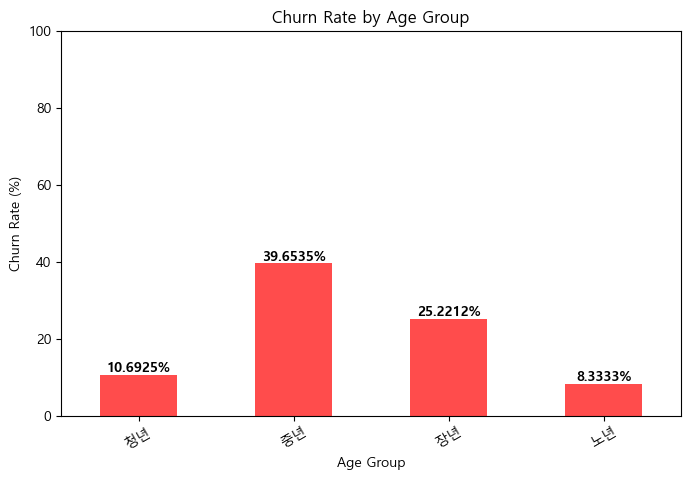

In [72]:

# 연령대 순서를 지정
age_order = ["청년", "중년", "장년", '노년']

# 연령대별 이탈률(%) 계산
churn_data_age = df.groupby('age_group')['churn'].mean() * 100

# 지정된 순서대로 정렬
churn_data_age = churn_data_age.reindex(age_order)

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_age.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


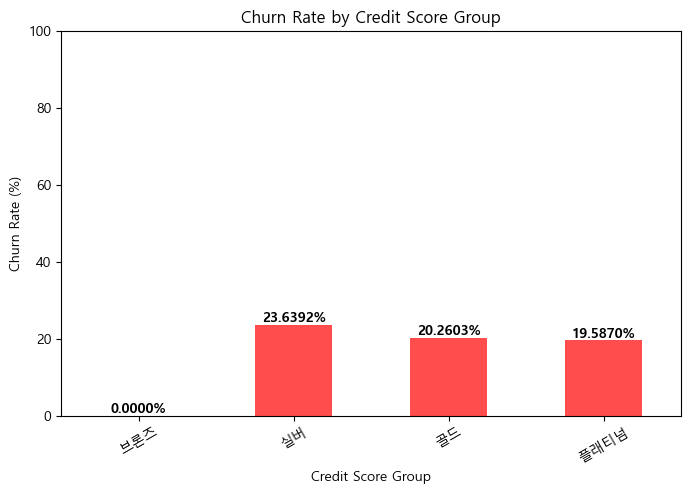

In [73]:
credit_order = ["브론즈", "실버", "골드", '플래티넘']

# 신용 점수 그룹별 이탈률(%) 계산
churn_data_credit = df.groupby('credit_score_group')['churn'].mean() * 100
churn_data_credit = churn_data_credit.reindex(credit_order)
# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_credit.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Credit Score Group")
plt.xlabel("Credit Score Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

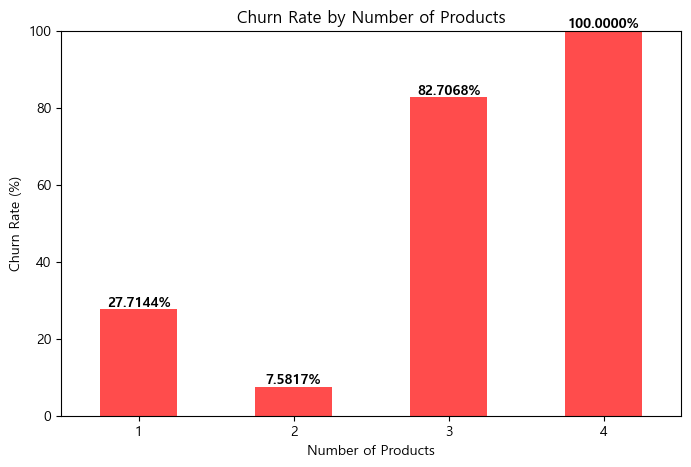

In [74]:

# 상품 개수별 이탈률(%) 계산
churn_data_product = df.groupby('products_number')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_product.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


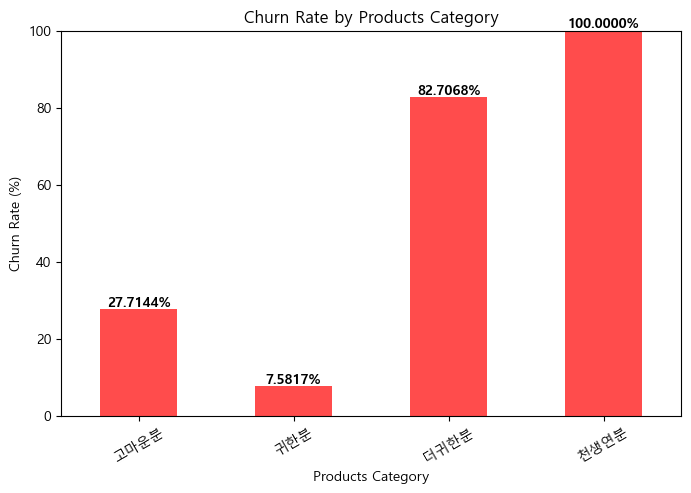

In [75]:

product_order = ['고마운분', '귀한분', '더귀한분', '천생연분']

# 상품 카테고리별 이탈률(%) 계산
churn_data_category = df.groupby('products_category')['churn'].mean() * 100
churn_data_category = churn_data_category.reindex(product_order)
# 그래프 시각화
plt.figure(figsize=(8, 5))
ax =churn_data_category.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Products Category")
plt.xlabel("Products Category")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)


for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


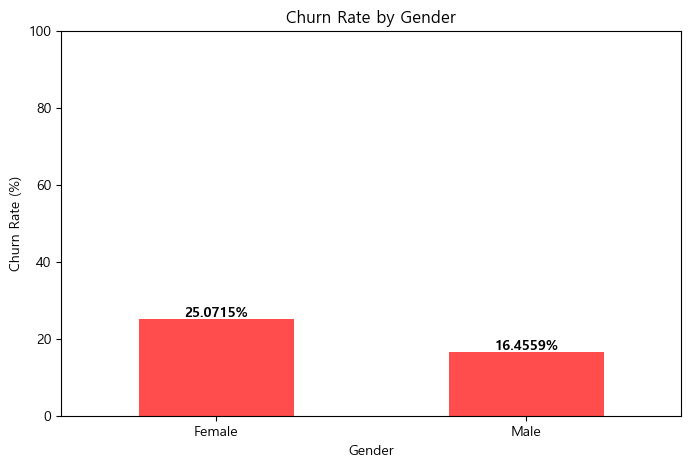

In [76]:
# 성별 이탈률(%) 계산
churn_data_gender = df.groupby('gender')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_gender.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


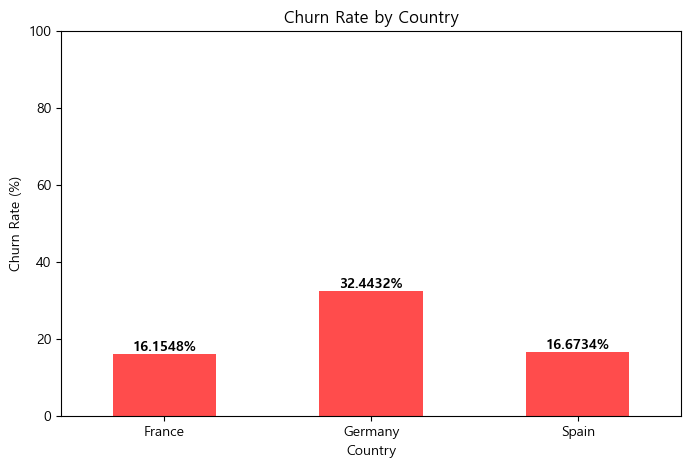

In [77]:
# 국가별 이탈률(%) 계산
churn_data_country = df.groupby('country')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_country.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Country")
plt.xlabel("Country")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


---

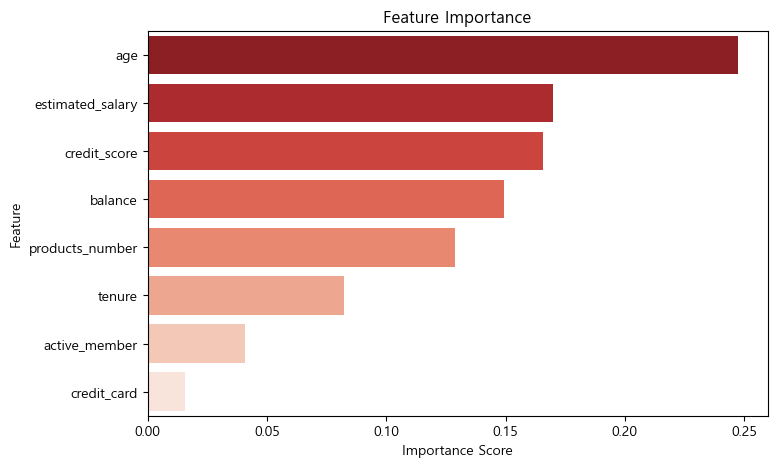

In [66]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 
            'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 데이터프레임으로 변환 후 정렬
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Reds_r")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
